## Electronics Store Sales Analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### 1. Clean up the data

#### Merge past 12 months sales data into one CSV file

In [2]:
files = [file for file in os.listdir("./Sales_Data")] #Get csv file names into a list

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file) #store each month data into a dataframe
    all_months_data = pd.concat([all_months_data, df]) #concatenate each month into all month dataframe

all_months_data.to_csv("all_months_data.csv", index=False) #export all data to csv file

#### Read all data dataframe

In [3]:
all_data = pd.read_csv("all_months_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Drop rows of NaN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)] #Store and view Nan data
nan_df.head()

all_data = all_data.dropna(how="all") #Remove rows with Nan on all columns
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find data called "Or" in Month Column 

In [5]:
#There is an issue with Order date in some orders/rows. Filtering them out.
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

#### Converting colums to relevant data type

In [6]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) 
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


### Augment data with additional columns for analysis support

#### Add a month column

In [7]:
all_data["Month"] = all_data["Order Date"].dt.month #datetime data type can retrieve its data from series/columns
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Add a column for sales

In [8]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add a column for city and state

In [9]:
def get_city(address):
    address = address.split(",")[1] #split address from "," and retrieve second index from the list
    return address

def get_state(address):
    address = address.split(",")[2].split(" ")[1]
    return address

all_data["City"] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") #apply function to run functions for the desired column 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### 2. Analyse Data

#### Finding the month with highest sale

In [10]:
results_month = all_data.groupby("Month").sum() #extract sum of integer columns relevent to Month column
results_month

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


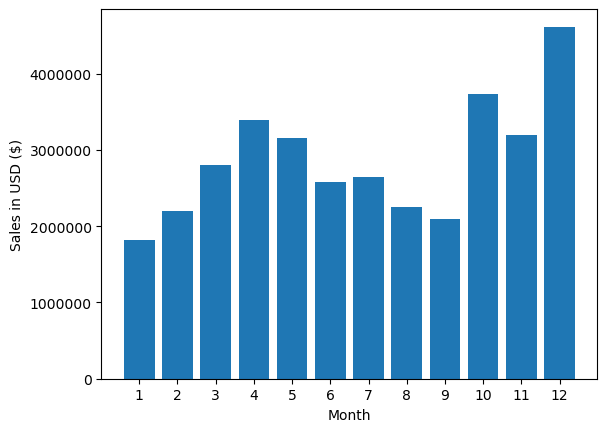

In [11]:
plt.bar(results_month.index, results_month["Sales"]) #Define x and y axis in bar chart
plt.xticks(results_month.index ) #View all the data in x axis
plt.ylabel("Sales in USD ($)") #Name y axis
plt.xlabel("Month") #Name x axis
plt.ticklabel_format(style="plain", axis='y') #Added this line to prevent y axis numbers present in scientific notation.
plt.show()

##### Conclusion : It is evident that the month of December had the highest sales. Understanding the seasonal patterns in sales allows the company to allocate resources effectively, optimize inventory management, and tailor marketing strategies to capitalize on the increased demand during December. By leveraging this information, businesses can make informed decisions to maximize revenue and drive overall growth.

#### Finding the city with highest sales

In [12]:
results_city = all_data.groupby("City").sum()

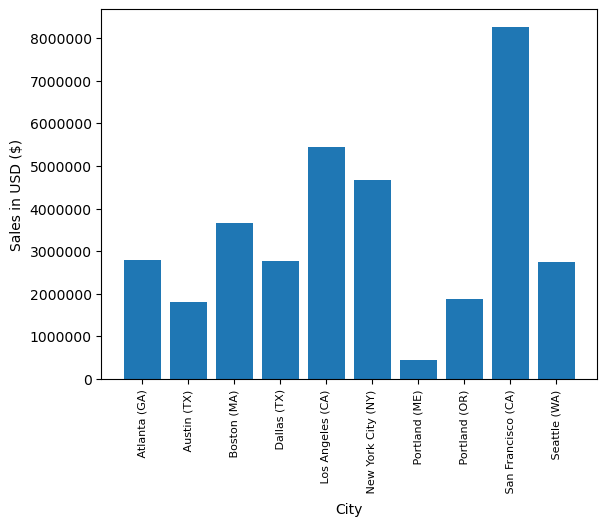

In [13]:
plt.bar(results_city.index, results_city["Sales"]) #Define x and y axis in bar chart
plt.xticks(results_city.index, rotation='vertical', size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City")
plt.ticklabel_format(style="plain", axis='y')
plt.show()

##### Conclusion :City of San Francisco had the highest sales. This finding is crucial for business as it highlights the importance of targeting and investing in the San Francisco market. By understanding the sales performance of different cities, company can allocate resources strategically, tailor their marketing campaigns, and optimize their supply chain operations to meet the demand in San Francisco effectively.

#### Finding the best hour with sales

In [14]:
#Adding more columns to analyse data
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


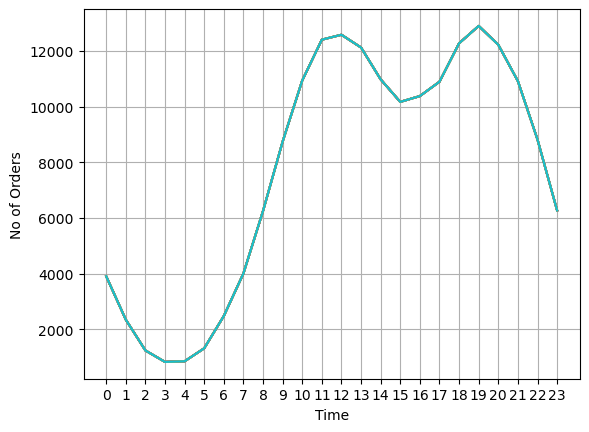

In [15]:
results_hour = all_data.groupby("Hour").sum()
plt.plot(results_hour.index, all_data.groupby("Hour").count())
plt.xticks(results_hour.index)
plt.ylabel("No of Orders")
plt.xlabel("Time")
plt.grid() #show grid in the plot
plt.show()


##### Conclusion :   After analyzing the sales data and identified that a significant number of orders were made during the time periods of 10 AM to 1 PM and 6 PM to 8 PM. This finding is valuable for business as it helps to understand on the peak hours of customer activity and allows for better resource allocation and operational planning. By recognizing these time periods of high order volume, companies can ensure sufficient staffing levels, optimize inventory management, and streamline order fulfillment processes during these specific hours. This information enables businesses to enhance customer satisfaction, minimize order processing time, and maximize sales opportunities during the identified time frames.

#### Finding best product combinations

In [16]:
#Identify duplicated order ids which represent multi item orders. 
pair_df = all_data[all_data["Order ID"].duplicated(keep=False)]

pair_df["Grouped"] = pair_df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x)) #join row data from two columns to another.

pair_df = pair_df[["Order ID", "Grouped"]].drop_duplicates() #remove duplicates

pair_df.head(100)

C:\Users\RISHEE\AppData\Local\Temp\ipykernel_5908\3877486543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_df["Grouped"] = pair_df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x)) #join row data from two columns to another.


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [17]:
count = Counter()

for row in pair_df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2))) #Counts the number of combinations. "2" represents the number of items in combination
    
for key, value in count.most_common(10): #Retrieve 10 most sold product pairs
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


##### Conclusion : Discovered best pairs of products that are frequently added to the cart together. This finding provides insights into customer behavior and preferences, allowing for strategic marketing and sales initiatives. By understanding the product combinations that customers tend to purchase together, business can implement effective cross-selling and upselling strategies. This information enables companies to personalize product recommendations, optimize product placement, and enhance the overall customer shopping experience. Leveraging these insights, businesses can maximize revenue, improve customer satisfaction, and drive long-term customer loyalty.

#### Finding the most sold product

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


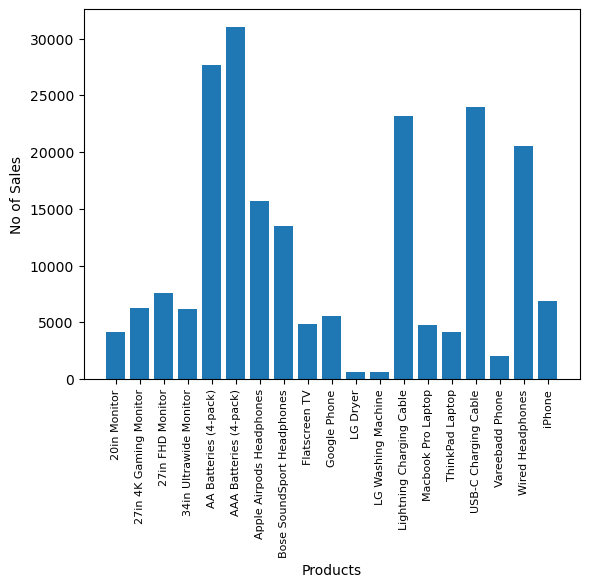

In [19]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]
products = quantity_ordered.index

plt.bar(products, quantity_ordered) #Define x and y axis in bar chart
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel("No of Sales")
plt.xlabel("Products")
plt.ticklabel_format(style="plain", axis='y')
plt.show()

C:\Users\RISHEE\AppData\Local\Temp\ipykernel_5908\22650857.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


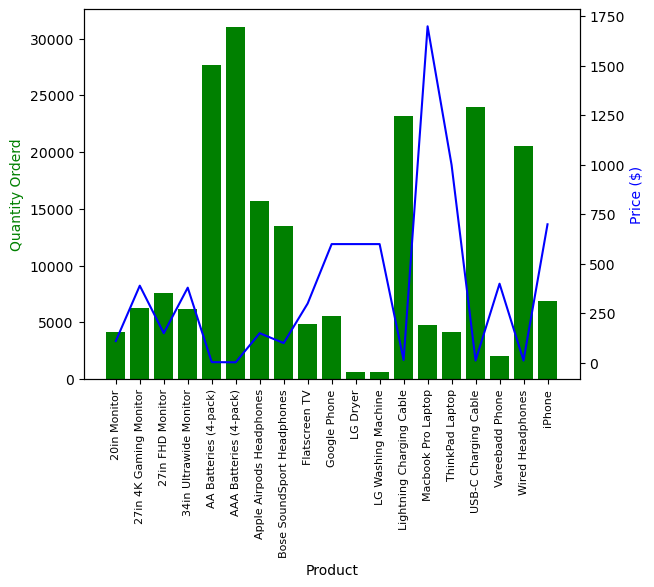

In [20]:
prices = all_data.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots() 

ax2 = ax1.twinx() #Two y axises share x axis
ax1.bar(products, quantity_ordered, color='g') #Defining x and y for the first y axis (bar chart)
ax2.plot(products, prices, 'b-') #Defining x and y for the second y axis (line chart)

ax1.set_xlabel("Product")
ax1.set_ylabel("Quantity Orderd", color="g")
ax2.set_ylabel("Price ($)", color="b")
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

##### Conclusion : By combining the insights on the most sold products and their average selling prices, business can tailor their marketing efforts, promotions, and discounts to further drive sales and increase customer satisfaction. This knowledge allows for effective supply chain management and inventory planning to avoid stockouts and meet customer expectations.